100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 150.93it/s]


<class 'numpy.ndarray'>
(100, 100)


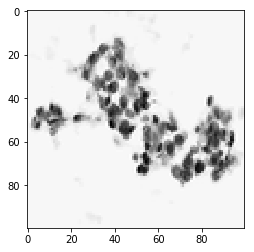

In [23]:
# Load images
from PIL import Image
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
DIR_NAME = './cancer_images'
IMG_SIZE = 100
tumor = []

# Label the pictures with the type of tumor
tumor_labels = []
benign_files = '92_751 92_5311 92_5292 92_5291 92_5277 92_5236 92_4964 92_4934 92_4632 92_4342'.split()
i = 0
for filename in benign_files:
    benign_files[i] = filename+'.gif'
    i+=1
        
for img in tqdm(os.listdir(DIR_NAME)):
    if img in benign_files:
        tumor_labels.append(0)
    else:
        tumor_labels.append(1)
    path = os.path.join(DIR_NAME, img)
    if "DS_Store" not in path:
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        tumor.append(np.array(img))
    
print(type(tumor[0]))
print(tumor[0].shape)
plt.imshow(tumor[0], cmap = 'gist_gray')
plt.show()

In [13]:
# Convert images to a list of darkness for each pixel
tumor_aslist = []
for photo in tumor:
    tumor_aslist.append(photo.flatten())

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(tumor_aslist)
pred = kmeans.labels_

In [33]:
TP = 0
TN = 0
FP = 0
FN = 0
i = 0
for result in pred:
    if result == 1 and tumor_labels[i]==1:
        TP+=1
    if result == 1 and tumor_labels[i]==0:
        FP+=1
    if result == 0 and tumor_labels[i]==1:
        FN+=1
    if result == 0 and tumor_labels[i]==0:
        TN+=1
    i+=1
print([TN, FP])
print([FN, TP])

[4, 5]
[3, 8]


In [34]:
precision = round(TP/(TP+FP), 2)
recall = round(TP/(TP+FN),2)
F1 = round(2*precision*recall/(precision+recall),2)
accuracy = round((TP+TN)/(TP+FP+FN+TN), 2)
print('Precision: ',precision,'\nRecall: ',recall,'\nF1: ',F1,'\nAccuracy:', accuracy)

Precision:  0.62 
Recall:  0.73 
F1:  0.67 
Accuracy: 0.6
